<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/workbook/5_nlp_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка
В этом воркбуке мы познакомимся с библиотеками для обработки естественного языка и отработаем цикл FOR.

**HuggingFace Datasets**

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

`pip install` - команда shell для загрузки библиотеки

`-q` - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

`!` - символ для объявления shell-команд

In [4]:
!pip install -q datasets

Загрузим датасет для анализа тональности текстов

In [5]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

Проведем анализ!

Структура объекта dataset довольно сложная, но удобная для интерпретации.

У нас есть 3 выборки: train, validation и test.

В каждой выборке 4 столбца:

- ID элемента датасета, он нужен, чтобы все значения были уникальными, как в реляционной БД
- text, label, sentiment

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

Обычно для обработки таких данных используется библиотека pandas, но пока мы учимся, будем использовать нативный метод - цикл FOR.

#**Задание 1**

Для начала проверим, сбалансирован ли наш датасет.

In [7]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [11]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
# Подсказки:
# - создайте пустые переменные, куда вы будете вносить количество меток
# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
# - выведите на экран значения переменных для каждой из трех выборок

### ваш код здесь ###
counter_positive_train = 0
counter_negative_train = 0
counter_neutral_train = 0
for i in dataset['train']:
    if i['sentiment'] == 'positive':
        counter_positive_train += 1
    elif i['sentiment'] == 'negative':
        counter_negative_train += 1
    elif i['sentiment'] == 'neutral':
        counter_neutral_train += 1
print('Данные обучающей выборки')
print('---')
print(f'''Количество позитивных меток: {counter_positive_train}
Количество негативных меток: {counter_negative_train}
Количество нейтральных меток: {counter_neutral_train}
''')
print()
counter_neutral_val = 0
counter_negative_val = 0
counter_positive_val = 0
for i in dataset['validation']:
    if i['sentiment'] == 'positive':
        counter_positive_val += 1
    elif i['sentiment'] == 'negative':
        counter_negative_val += 1
    elif i['sentiment'] == 'neutral':
        counter_neutral_val += 1
print('Данные проверочной выборки')
print('---')
print(f'''Количество позитивных меток: {counter_positive_val}
Количество негативных меток: {counter_negative_val}
Количество нейтральных меток: {counter_neutral_val}
''')
print()
counter_neutral_test = 0
counter_negative_test = 0
counter_positive_test = 0
for i in dataset['test']:
    if i['sentiment'] == 'positive':
        counter_positive_test += 1
    elif i['sentiment'] == 'negative':
        counter_negative_test += 1
    elif i['sentiment'] == 'neutral':
        counter_neutral_test += 1
print('Данные тестовой выборки')
print('---')
print(f'''Количество позитивных меток: {counter_positive_test}
Количество негативных меток: {counter_negative_test}
Количество нейтральных меток: {counter_neutral_test}
''')

Данные обучающей выборки
---
Количество позитивных меток: 10478
Количество негативных меток: 9105
Количество нейтральных меток: 11649


Данные проверочной выборки
---
Количество позитивных меток: 1760
Количество негативных меток: 1517
Количество нейтральных меток: 1928


Данные тестовой выборки
---
Количество позитивных меток: 1730
Количество негативных меток: 1546
Количество нейтральных меток: 1930



In [35]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке
labels_train = counter_positive_train + counter_negative_train + counter_neutral_train
labels_val = counter_negative_val + counter_neutral_val + counter_positive_val
labels_test = counter_negative_test + counter_neutral_test + counter_positive_test
print(f'''
Данные обучающей выборки:
Положительные метки составляют {round((counter_positive_train/labels_train*100), 2)} % выборки
Отрицательные метки составляют {round((counter_negative_train/labels_train*100), 2)} % выборки
Нейтральные метки составляют {round((counter_neutral_train/labels_train), 2)*100} % выборки

Данные проверочной выборки:
Положительные метки составляют {round((counter_positive_val/labels_val*100), 2)} % выборки
Отрицательные метки составляют {round((counter_negative_val/labels_val*100), 2)} % выборки
Нейтральные метки составляют {round((counter_neutral_val/labels_val*100), 2)} % выборки

Данные тестовой выборки:
Положительные метки составляют {round((counter_positive_test/labels_test*100), 2)} % выборки
Отрицательные метки составляют {round((counter_negative_test/labels_test*100), 2)} % выборки
Нейтральные метки составляют {round((counter_neutral_test/labels_test*100), 2)} % выборки
''')


Данные обучающей выборки:
Положительные метки составляют 33.55 % выборки
Отрицательные метки составляют 29.15 % выборки
Нейтральные метки составляют 37.0 % выборки

Данные проверочной выборки:
Положительные метки составляют 33.81 % выборки
Отрицательные метки составляют 29.15 % выборки
Нейтральные метки составляют 37.04 % выборки

Данные тестовой выборки:
Положительные метки составляют 33.23 % выборки
Отрицательные метки составляют 29.7 % выборки
Нейтральные метки составляют 37.07 % выборки



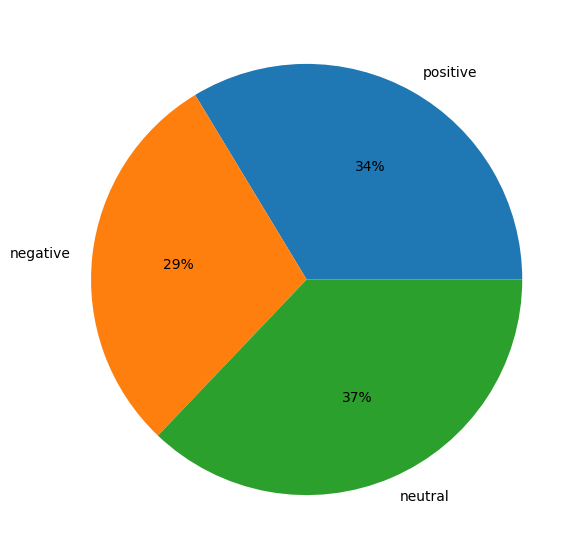

In [42]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ['positive', 'negative', 'neutral']
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = ['33.55', '29.15', '37']

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

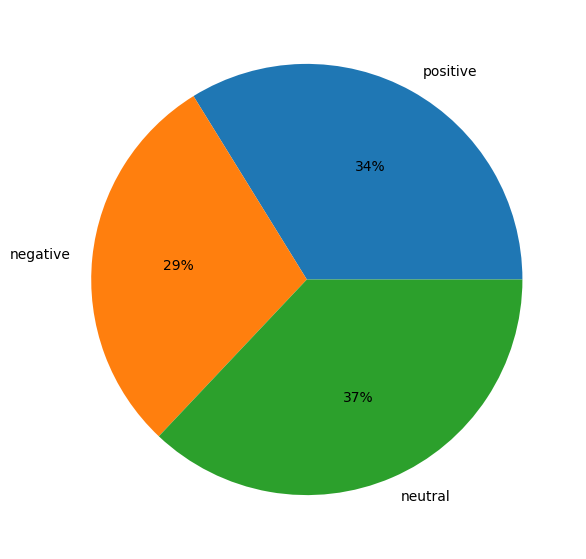

In [43]:
# Сделаем то же самое для проверочной выборки
### ваш код здесь ###
# Код для отрисовки круговой диаграммы
data_val = [33.81,29.15,37.04]
fig = plt.figure(figsize=(10, 7))
plt.pie(data_val, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

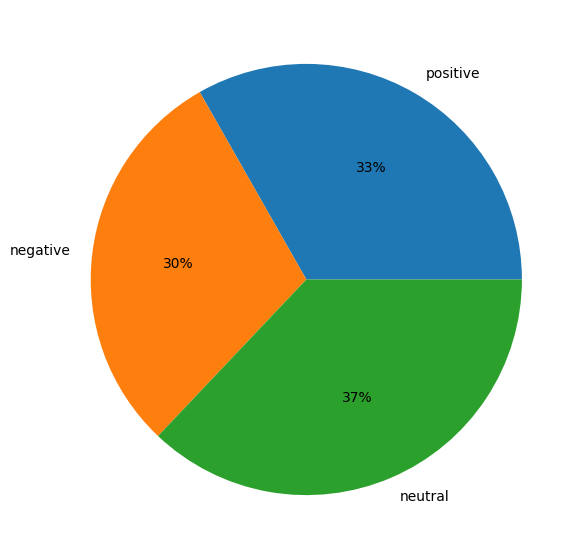

In [44]:
# Сделаем то же самое для тестовой выборки
### ваш код здесь ###
# Код для отрисовки круговой диаграммы
data_test = [33.23, 29.7, 37.07]
fig = plt.figure(figsize=(10, 7))
plt.pie(data_test, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

#**Задание 2**

Займемся обработкой естественного языка.

Познакомимся с библиотекой SpaCy для обработки текстов.

In [48]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Токенизация SpaCy производится с помощью цикла for

In [49]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [50]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [51]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [52]:
# Частеречная разметка
for token in doc:
    print(token.pos_)

VERB
NOUN
NOUN
PUNCT
ADJ


In [53]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cook
microwave
pizza
,
yummy


In [54]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

VBG
NN
NNS
,
JJ


In [55]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

amod
compound
ROOT
punct
amod


In [56]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Aspect=Prog|Tense=Pres|VerbForm=Part
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


Задание!

1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [148]:
### ваш код здесь ###
# Выведите первые 5 текстов
texts_test = [nlp(i['text']) for i in dataset['test'] if isinstance(i['text'], str)] #сразу собрал список текстов как нлп объектов
texts_test[:5]

[getting cds ready for tour,
  MC, happy mother`s day to your mom ;).. love yah,
 A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?,
  because you had chips and sale w/o me,
 Great for organising my work life balance]

2. Создадим список токенов для каждого текста с помощью SpaCy

In [149]:
### ваш код здесь ###
# Не забудьте применить nlp!
# Выведите первые 5 текстов
# Обработка может занять много времени, достаточно обработать первые 100 текстов
tokenized_test = [[token.text for token in text] for text in texts_test[:100]]
tokenized_test[:10]


[['getting', 'cds', 'ready', 'for', 'tour'],
 [' ',
  'MC',
  ',',
  'happy',
  'mother`s',
  'day',
  'to',
  'your',
  'mom',
  ';)',
  '..',
  'love',
  'yah'],
 ['A',
  'year',
  'from',
  'now',
  'is',
  'graduation',
  '....',
  'i',
  'am',
  'pretty',
  'sure',
  'i`m',
  'not',
  'ready',
  'for',
  'it',
  '!',
  '?',
  '!',
  '?',
  '!',
  '?'],
 [' ', 'because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me'],
 ['Great', 'for', 'organising', 'my', 'work', 'life', 'balance'],
 [' ',
  'its',
  'my',
  'going',
  'away',
  'partyyy',
  ' ',
  '`',
  's.',
  ' ',
  'you',
  'should',
  'come',
  '!'],
 ['Is',
  'Watching',
  'Britains',
  'Got',
  'Talent',
  ',',
  '&',
  'Is',
  'biting',
  'her',
  'nails',
  '.',
  'Please',
  'don`t',
  'come',
  'off',
  'black',
  'nail',
  'varnish'],
 [' ',
  'remember',
  'the',
  'guy',
  'who',
  '1st',
  '#',
  'tweetbud',
  'you',
  '!',
  '~',
  '>',
  '_',
  '2890',
  ' ',
  'help',
  'him',
  'get',
  '900',
  'flwrs',
  '

3. Частеречная разметка: создаем список частей речи для каждого токена

In [ ]:
### ваш код здесь ###
pos_test = [[(token, token.pos_) for token in text] for text in texts_test[:100]]


4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [ ]:
#я сразу включил в список кортежи токен - частеречная разметка
pos_test[:5] 

5. Разметка именованных сущностей

Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.

In [168]:
# Для каждого текста из выбранного среза: допишите этот код
print([[(ent, ent.label_) for ent in text.ents] for text in texts_test[7:20]]) # Выведем именованную сущность и ее лейбл

[[(tweetbud, 'PERSON'), (2890, 'CARDINAL')], [(first, 'ORDINAL')], [(today, 'DATE'), (i`m, 'NORP')], [], [(Audi, 'PRODUCT')], [], [], [], [], [], [(TY, 'ORG')], [(recent years, 'DATE')], []]


Здесь мы используем новый тип данных - кортеж `(entity, label)`

Кортеж очень похож на список. Разница только в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.

Кортежи занимают меньше памяти, т.к. у них меньше свойств. Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря `dict`.

На практике, их удобно применять для разметки данных  методами NLP.

In [167]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
displacy.render(doc[:50], style='ent', jupyter=True)
### здесь укажите любой нетокенизированный текст из датасета с помощью индексации ###), style="ent", jupyter=True)